In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report

# Add docstrings to all functions!
# add note about why the loss_hist oscillates so much (because it is not batch gd or even mini-batch gd)
* [super helpful explanations of all types of gradient descent](https://am207.github.io/2017/wiki/gradientdescent.html#stochastic-gradient-descent)

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3)
np.place(y, y==0, -1)

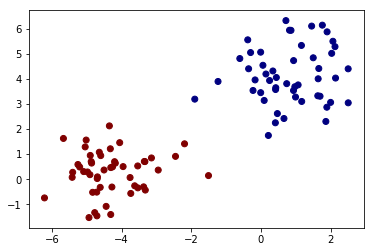

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

In [206]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

---

In [4]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [5]:
X = add_intercept(X)

In [6]:
def hinge_loss(X_i, y_i, weights):
    loss = 1 - y_i * np.dot(weights.T, X_i)
    if loss < 0:
        loss = 0
    return loss

In [7]:
w = np.zeros(len(X[0]))

In [8]:
loss = []
for i in range(len(X)):
    loss.append(hinge_loss(X[i], y[i], w))
total_loss = np.sum(loss)
total_loss

100.0

In [9]:
w

array([ 0.,  0.,  0.])

In [10]:
learning_rate = 1
num_iters = 1000
w = np.zeros(len(X[0]))
# lambda = 1/iteration
loss_hist = []

def Stochastic_Gradient_Descent(X, y, weights, learning_rate, num_iters):
    for iteration in range(1, num_iters):
        for row in range(len(X)):
            loss = hinge_loss(X[row], y[row], weights)
            if loss == 0:
                weights = weights - learning_rate * ((2  * (1/iteration) * weights))
            else:
                weights = weights - learning_rate * ((-y[row] * X[row]) + (2  * (1/iteration) * weights))
    return weights
            

In [11]:
weights = Stochastic_Gradient_Descent(X = X, y=y, weights = w, learning_rate=1, num_iters = 1000)

In [12]:
weights

array([  2.12889977e-03,  -3.55624119e+00,  -2.75181965e+00])

In [13]:
loss = []
for i in range(len(X)):
    loss.append(hinge_loss(X[i], y[i], weights))
total_loss = np.sum(loss)
total_loss

0

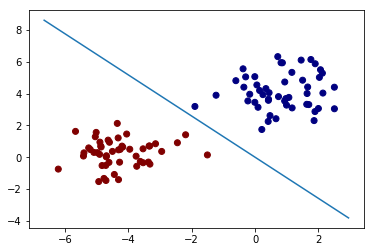

In [14]:
# it works, we've found the perfectly separating hyperplane!
plt.scatter(X[:,1], X[:,2], c=y, cmap = 'jet')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
plt.plot(xx, (-weights[1]/weights[2]) * xx - (weights[0]/weights[2]))

If decide to split this into training and test sets: use this predict function!

In [16]:
def predict(X, weights):
    predictions = np.array([])
    for i in range(len(X)):
        dist_from_hyp = np.dot(X[i], weights)
        if dist_from_hyp > 0:
            predictions = np.append(predictions, 1)
        else:
            predictions = np.append(predictions, -1)
    return predictions

In [17]:
#preds = predict(X_test, weights)
#print(classification_report(y, preds))

## Now apply Scikit-Learn SVM to Crash data

In [28]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [22]:
X = pd.read_csv('Data/Crash_X2_prepared.csv')
# deleting the dummie columns that double up
X = X.drop(['DRIVER1SEX_F', 'EMRGVEH_No', 'D1COND_Fatigue / Sick', 'MOTORCYCLE_No', 'CRASHSEVER_Property Damage Only' ], axis=1)
y = pd.read_csv('Data/Crash_y2.csv')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [24]:
# Fit the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf.coef_

array([[ -6.29920955e-05,  -2.55673019e-05,   5.47977257e-05,
         -3.67141563e-05,   2.43862441e-05,   5.19146302e-05,
         -8.16505670e-04,   9.07554341e-05,   1.17477975e-05,
          1.99982838e+00,  -1.67895171e-04,   1.94747806e-04,
         -1.94747803e-04,   5.04960751e-06,   1.07416327e-04,
          3.72678038e-04]])

In [26]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92     18944
          1       0.89      0.42      0.57      5139

avg / total       0.87      0.86      0.84     24083



In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True negatives:', tn)
print('True positives:', tp)
print('False negatives:', fn)
print('False Positives:', fp)

True negatives: 18679
True positives: 2136
False negatives: 3003
False Positives: 265
